<a href="https://colab.research.google.com/github/Pineappledeydre/credit-delay-analysis/blob/main/Khokhlacheva_TZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Дарья Хохлачева - Тестовое Задание**
- [Ссылка на hh](https://hh.ru/resume/5c114f00ff0dd12cdd0039ed1f447454344f48)
- [Ссылка на Telegram](https://t.me/padeydre)

## **Загрузка Данных**

- order_id – номер заявки
- created_at - дата создания заявки
- put_at - дата выдачи
- closed_at - дата закрытия
- issued_sum - сумма выдачи
- plan_at - дата планового платежа
- plan_sum_total - сумма планового платежа (накопленным итогом)
- paid_at - дата фактического платежа
- paid_sum - сумма фактического платежа


In [152]:
import pandas as pd

orders = pd.read_csv("/content/orders.csv")
plan = pd.read_csv("/content/plan.csv")
payments = pd.read_csv("/content/payments.csv")

orders.head()  # здесь order_id -  уникальный

,order_id,created_at,put_at,closed_at,issued_sum
0,400001732,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0
1,400005838,2022-06-02 00:10:22.997,2022-06-02 15:41:33.267,2022-06-02 17:38:43.917,20000.0
2,400007915,2022-06-02 00:18:04.000,2022-06-05 19:17:38.547,2022-06-21 21:55:51.877,5820.0
3,400008952,2022-06-02 00:22:07.000,2022-06-03 14:25:18.033,2022-07-12 10:47:46.307,9000.0
4,400009027,2022-06-02 00:25:39.000,2022-06-02 00:40:40.320,2022-06-22 14:15:07.423,5000.0


In [153]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55748 entries, 0 to 55747
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    55748 non-null  int64  
 1   created_at  55748 non-null  object 
 2   put_at      55748 non-null  object 
 3   closed_at   46472 non-null  object 
 4   issued_sum  55748 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ MB


Много пропусков в **closed_at**

**Исправление Типов данных**

In [154]:
orders['created_at'] = pd.to_datetime(orders['created_at'])
orders["closed_at"] = pd.to_datetime(orders["closed_at"], errors='coerce')
orders['put_at'] = pd.to_datetime(orders['put_at'])

In [155]:
orders.describe()

,order_id,created_at,put_at,closed_at,issued_sum
count,5.574800e+04,55748,55748,46472,55748.000000
mean,4.477471e+08,2022-07-17 18:39:46.071710208,2022-07-20 10:34:09.089166336,2022-08-19 02:29:16.057067520,7907.202052
min,4.000017e+08,2022-06-02 00:00:23.997000,2022-06-02 00:40:40.320000,2022-06-02 06:53:54.503000,1000.000000
25%,4.237195e+08,2022-06-24 17:11:26.247000064,2022-06-27 18:19:40.993500160,2022-07-19 17:54:56.134500096,4000.000000
50%,4.480092e+08,2022-07-17 18:42:36,2022-07-20 18:03:11.164999936,2022-08-15 20:33:26.241999872,7290.000000
75%,4.716685e+08,2022-08-09 14:34:08.499249920,2022-08-11 20:32:59.392749824,2022-09-12 06:44:54.682500096,10850.000000
max,4.951775e+08,2022-08-31 23:49:42.997000,2022-09-29 18:46:58.387000,2022-12-08 09:48:38.233000,28570.000000
std,2.755391e+07,NaN,NaN,NaN,4985.848416


In [156]:
plan.head()

,order_id,plan_at,plan_sum_total
0,400001732,2022-06-02,5600.0
1,400001732,2022-07-02,9450.0
2,400001732,2022-08-01,12170.0
3,400001732,2022-08-31,14890.0
4,400001732,2022-09-30,17610.0


**Исправление Типов данных**

In [157]:
plan['plan_at']=pd.to_datetime(plan['plan_at'])

In [158]:
plan.describe()

,order_id,plan_at,plan_sum_total
count,4.202820e+05,420282,4.202820e+05
mean,4.478982e+08,2022-10-10 12:39:00.691249920,8.662569e+03
min,4.000017e+08,2022-06-02 00:00:00,0.000000e+00
25%,4.237028e+08,2022-08-22 00:00:00,3.570000e+03
50%,4.480977e+08,2022-10-09 00:00:00,6.900000e+03
75%,4.720303e+08,2022-11-29 00:00:00,1.215847e+04
max,4.951775e+08,2023-06-11 00:00:00,2.300000e+06
std,2.756899e+07,NaN,1.095191e+04


In [159]:
payments.head()

,order_id,paid_at,paid_sum
0,400013633,2022-06-02 00:48:13.800,2500.0
1,400018480,2022-06-02 01:52:05.707,1070.0
2,400032001,2022-06-02 04:55:40.307,4200.0
3,400033195,2022-06-02 05:44:23.480,2850.0
4,400039407,2022-06-02 06:53:54.503,10100.0


In [160]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143284 entries, 0 to 143283
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   order_id  143284 non-null  int64  
 1   paid_at   143284 non-null  object 
 2   paid_sum  143284 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ MB


**Исправление Типов данных**

In [161]:
payments['paid_at']=pd.to_datetime(payments['paid_at'])

In [162]:
payments.describe()

,order_id,paid_at,paid_sum
count,1.432840e+05,143284,143284.000000
mean,4.471506e+08,2022-08-21 00:37:39.483453952,3902.743457
min,4.000017e+08,2022-06-02 00:48:13.800000,0.020000
25%,4.231827e+08,2022-07-19 15:47:43.870749952,1039.700000
50%,4.470855e+08,2022-08-16 23:32:21.457999872,2125.600000
75%,4.707384e+08,2022-09-15 17:47:56.326749952,4600.000000
max,4.951775e+08,2022-12-08 13:28:23.703000,49469.370000
std,2.742581e+07,NaN,4528.141434


## **Проверим на подозрительные значения**

In [163]:
print(payments[payments["paid_sum"] < 0])
print(orders[orders["issued_sum"] <= 0])
print(plan[plan["plan_sum_total"] < 0])

Empty DataFrame
Columns: [order_id, paid_at, paid_sum]
Index: []
Empty DataFrame
Columns: [order_id, created_at, put_at, closed_at, issued_sum]
Index: []
Empty DataFrame
Columns: [order_id, plan_at, plan_sum_total]
Index: []


**Проверим на дупликаты**

In [164]:
print(orders.duplicated().sum())
print(plan.duplicated().sum())
print(payments.duplicated().sum())

0
0
5


In [165]:
payments[payments.duplicated()]

,order_id,paid_at,paid_sum
11475,411504997,2022-06-24 17:14:56.997,10100.0
12470,422632789,2022-06-25 23:16:16.000,8080.0
37759,432761640,2022-07-21 12:38:12.000,150.0
38414,420036980,2022-07-21 20:08:58.997,4800.0
139590,456075017,2022-11-22 19:44:08.793,2720.0


**Аномальные значения:**
- Отрицательные платежи (paid_sum < 0): 0 — всё чисто.
- Выдачи с нулевой или отрицательной суммой (issued_sum <= 0): 0 — ок.
- payments.csv: есть 5 дубликатов, которые нужно удалить для корректного анализа.


In [166]:
# Удалим дубликаты из payments
payments = payments.drop_duplicates()
payments.duplicated().sum()

np.int64(0)

**Уникальные заказы (по id)**

In [167]:
print("Number of orders: ", orders["order_id"].nunique())
print("Number of plans: ", plan["order_id"].nunique())
print("Number of payments: ", payments["order_id"].nunique())

Number of orders:  55748
Number of plans:  55748
Number of payments:  53730


Видим, что около 2К заказов еще не оплачены

**Топ 1% - верхние значения**

In [168]:
print("Количество значений выше 99% квантили: ")
print(len(orders[orders["issued_sum"] > orders["issued_sum"].quantile(0.99)]))
print(len(plan[plan["plan_sum_total"] > plan["plan_sum_total"].quantile(0.99)]))
print(len(payments[payments["paid_sum"] > payments["paid_sum"].quantile(0.99)]))

Количество значений выше 99% квантили: 
541
4202
1410


## **EDA**

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

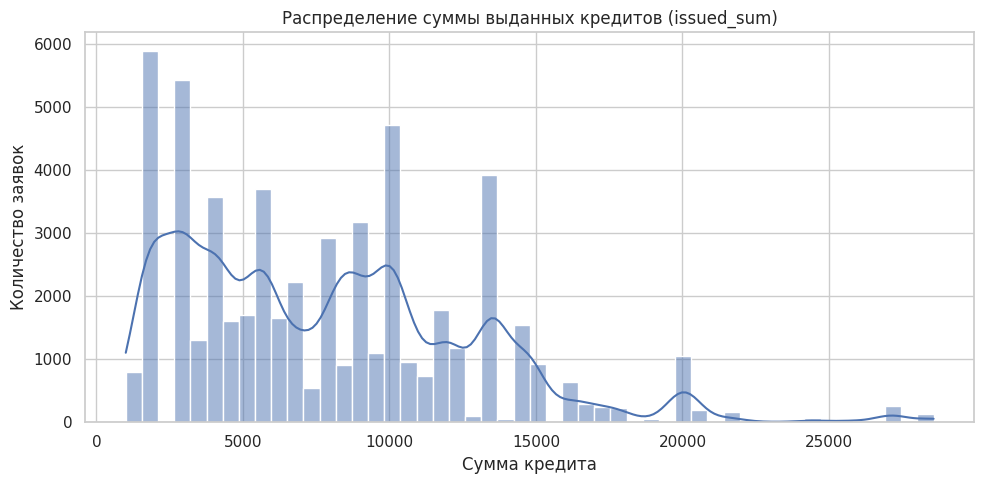

In [170]:
# Распределение сумм выдачи (issued_sum)
plt.figure(figsize=(10, 5))
sns.histplot(orders["issued_sum"], bins=50, kde=True)
plt.title("Распределение суммы выданных кредитов (issued_sum)")
plt.xlabel("Сумма кредита")
plt.ylabel("Количество заявок")
plt.tight_layout()
plt.show()

* Большинство заявок — на суммы до 20,000 ₽.
* Есть длинный правый хвост — крупные кредиты встречаются, но редко.

<ipython-input-171-7e72ee4e1572>:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


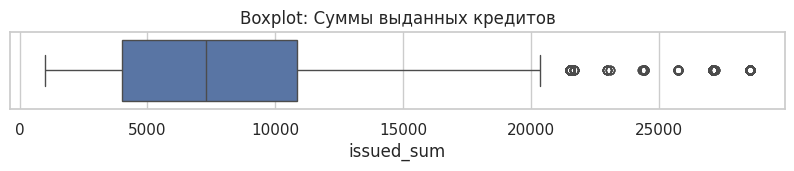

In [171]:
# Boxplot для issued_sum (на предмет выбросов)
plt.figure(figsize=(10, 1))
sns.boxplot(x=orders["issued_sum"])
plt.title("Boxplot: Суммы выданных кредитов")
plt.tight_layout()
plt.show()

* Подтверждает наличие выбросов (сильно выбивающихся сумм).
* Основная масса — в диапазоне до 20,000 ₽.

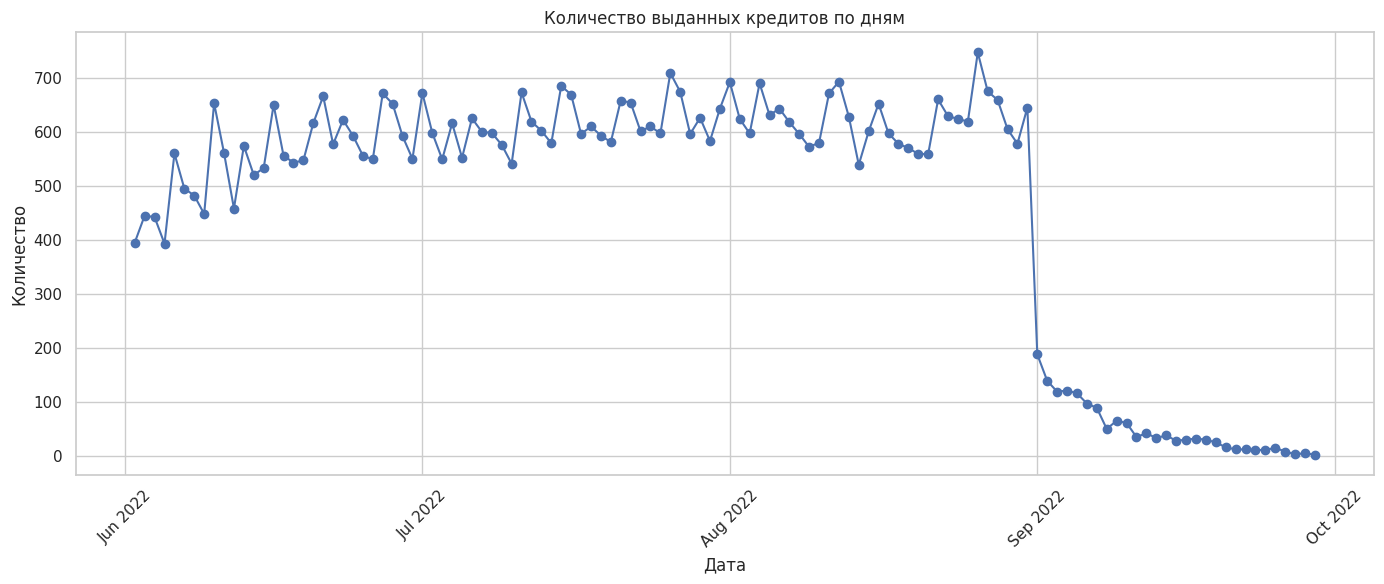

In [172]:
orders["put_day"] = orders["put_at"].dt.floor("D")  # округлим до дня
daily_issued = orders.groupby("put_day").size()

plt.figure(figsize=(14, 6))
plt.plot(daily_issued.index, daily_issued.values, marker='o')
plt.title("Количество выданных кредитов по дням")
plt.xlabel("Дата")
plt.ylabel("Количество")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Видна периодичность: всплески в конкретные дни месяца
* Июль и август — пики активности, июнь - рост, а за сентябрь может быть просто меньше данных (?)

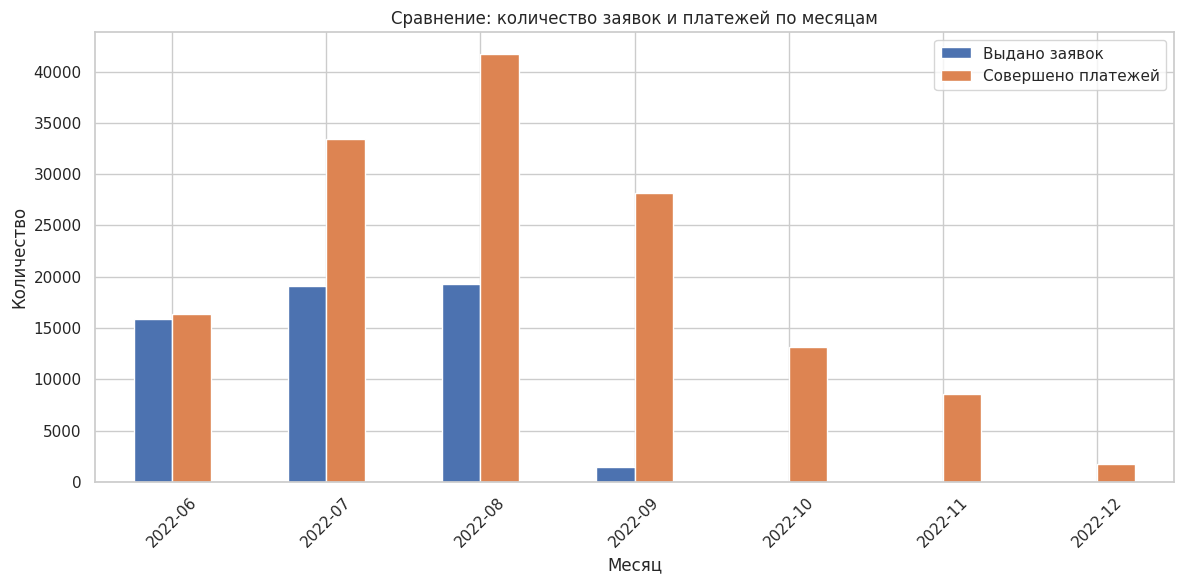

In [173]:
# Количество заявок и платежей по месяцам
orders["month"] = orders["put_at"].dt.to_period("M").astype(str)
payments["month"] = payments["paid_at"].dt.to_period("M").astype(str)

issued_monthly = orders.groupby("month").size().rename("Выдано заявок")
paid_monthly = payments.groupby("month").size().rename("Совершено платежей")
volume_df = pd.concat([issued_monthly, paid_monthly], axis=1).fillna(0)

volume_df.plot(kind="bar", figsize=(12, 6))
plt.title("Сравнение: количество заявок и платежей по месяцам")
plt.ylabel("Количество")
plt.xlabel("Месяц")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Выдача кредитов активна с июня по сентябрь.

* Платежи продолжаются вплоть до декабря — логично, учитывая, что клиенты платят после выдачи.

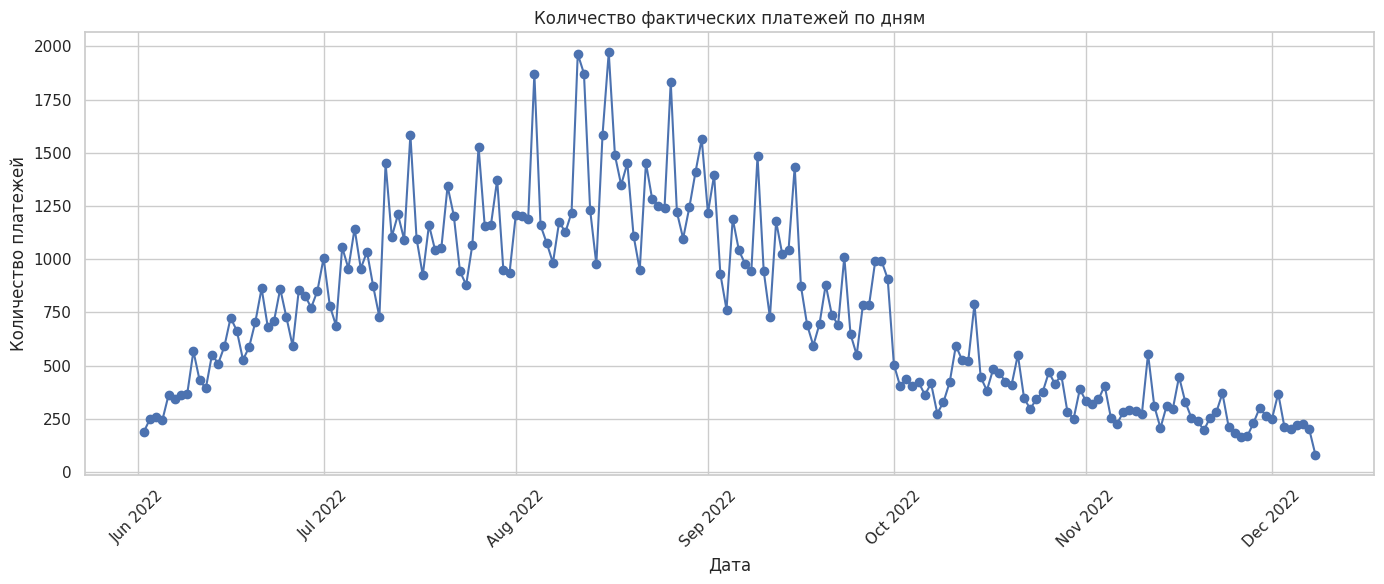

In [174]:
import matplotlib.dates as mdates

# Распределение платежей по дате
payments["paid_day"] = payments["paid_at"].dt.floor("D")
daily_paid = payments.groupby("paid_day").size()

plt.figure(figsize=(14, 6))
plt.plot(daily_paid.index, daily_paid.values, marker='o')
plt.title("Количество фактических платежей по дням")
plt.xlabel("Дата")
plt.ylabel("Количество платежей")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* Распределение имеет всплески — платёжное поведение клиентов носит циклический характе (?)
* Больше всего платежей совершается в середине каждого месяца.


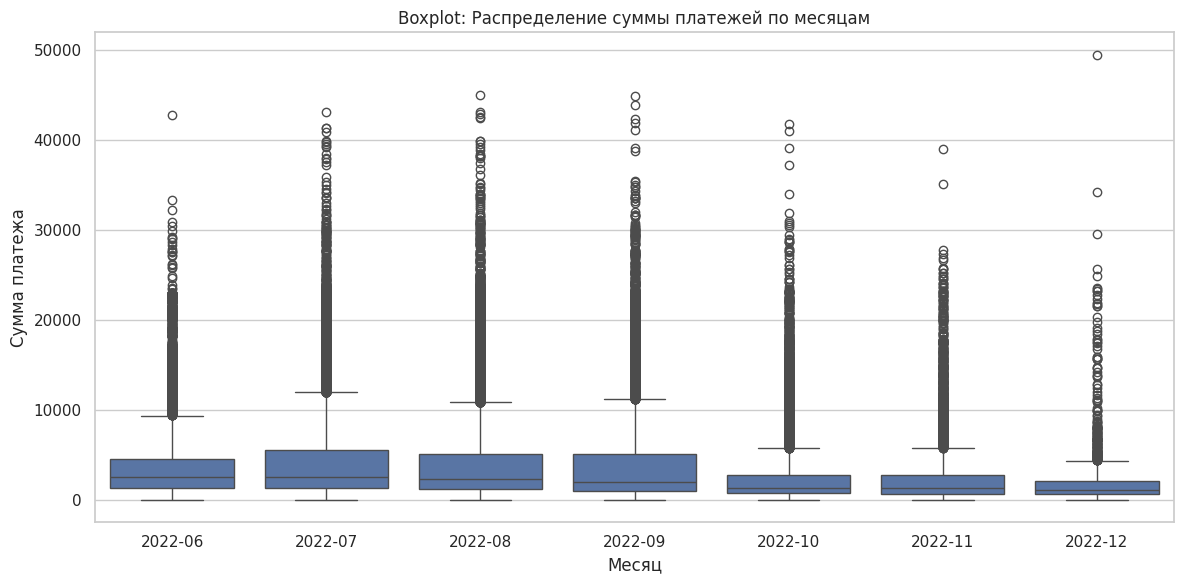

In [175]:
# Boxplot платежей по месяцам
payments["month"] = payments["paid_at"].dt.to_period("M").astype(str)

plt.figure(figsize=(12, 6))
sns.boxplot(x="month", y="paid_sum", data=payments)
plt.title("Boxplot: Распределение суммы платежей по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Сумма платежа")
plt.tight_layout()
plt.show()

Распределения довольно стабильны, но:

* В  декабре есть более высокое значения -  может указывать на закрытие перед концом года.
* Аномальные значения (выбросы) есть каждый месяц.

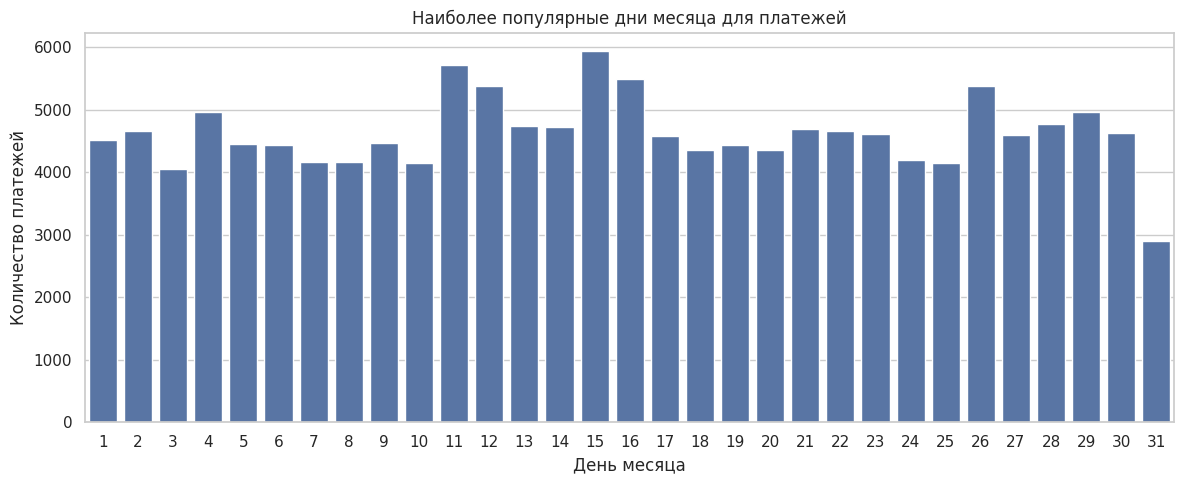

In [176]:
# Топ-дни месяца по количеству платежей
payments["day_of_month"] = payments["paid_at"].dt.day
day_counts = payments["day_of_month"].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.title("Наиболее популярные дни месяца для платежей")
plt.xlabel("День месяца")
plt.ylabel("Количество платежей")
plt.tight_layout()
plt.show()

Клиенты чаще платят в середине (?) месяца - есть пик.

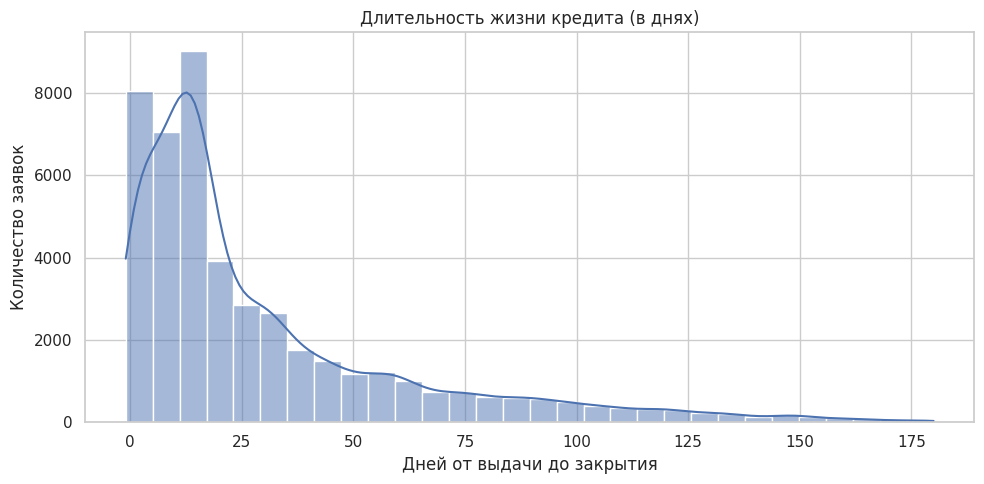

In [177]:
# Гистограмма длительности жизни кредита (в днях)
orders["duration_days"] = (orders["closed_at"] - orders["put_at"]).dt.days
plt.figure(figsize=(10, 5))
sns.histplot(orders["duration_days"].dropna(), bins=30, kde=True)
plt.title("Длительность жизни кредита (в днях)")
plt.xlabel("Дней от выдачи до закрытия")
plt.ylabel("Количество заявок")
plt.tight_layout()
plt.show()


* Большинство кредитов закрываются в течение 10–30 дней.
* Есть длинный хвост — часть клиентов платит очень долго или не закрывает кредит полностью.

## Анализ просрочек

In [184]:
# Проверим, есть ли у клиента строго один платеж в месяц по plan_at
plan["month"] = plan["plan_at"].dt.to_period("M")
plans_per_month = plan.groupby(["order_id", "month"]).size().reset_index(name="num_plans")

# Сколько клиентов имеют строго один план в каждом месяце?
clients_with_multiple_plans = plans_per_month[plans_per_month["num_plans"] > 1]["order_id"].nunique()
total_clients = plan["order_id"].nunique()

strictly_one_plan = total_clients - clients_with_multiple_plans
share_one_plan = strictly_one_plan / total_clients

print(f"Всего клиентов: {total_clients}")
print(f"Клиентов с >1 планом в каком-то месяце: {clients_with_multiple_plans}")
print(f"Клиентов со строго одним планом в каждом месяце: {strictly_one_plan}")
print(f"Доля клиентов с 1 планом в месяц: {round(share_one_plan, 3)}")

Всего клиентов: 55748
Клиентов с >1 планом в каком-то месяце: 27263
Клиентов со строго одним планом в каждом месяце: 28485
Доля клиентов с 1 планом в месяц: 0.511


In [185]:
# Расчет просрочки с накопительным подходом и отсечкой по дате 08.12.2022

# Сортировка данных
plan_sorted = plan.sort_values(by=["order_id", "plan_at"]).reset_index(drop=True)
payments_sorted = payments.sort_values(by=["order_id", "paid_at"]).reset_index(drop=True)

# Рассчитаем кумулятивные платежи по каждому order_id
payments_sorted["cumulative_paid"] = payments_sorted.groupby("order_id")["paid_sum"].cumsum()

plan_sorted = plan_sorted.rename(columns={"plan_at": "merge_key"})
payments_sorted = payments_sorted.rename(columns={"paid_at": "merge_key"})

# Глобальная сортировка по ключу для корректного merge_asof
plan_sorted = plan_sorted.sort_values("merge_key").reset_index(drop=True)
payments_sorted = payments_sorted.sort_values("merge_key").reset_index(drop=True)

# Накопительный мердж: ищем cumulative_paid на дату каждой плановой точки
merged = pd.merge_asof(
    plan_sorted,
    payments_sorted,
    on="merge_key",
    by="order_id",
    direction="backward",
    allow_exact_matches=True
)

merged = merged.rename(columns={"merge_key": "plan_at"})

# Ограничим по дате — только до момента анализа (08.12.2022)
cutoff_date = pd.to_datetime("2022-12-08")
merged = merged[merged["plan_at"] <= cutoff_date]

# Заполнение и расчёт просрочки
merged["cumulative_paid"] = merged["cumulative_paid"].fillna(0)
merged["overdue"] = (merged["plan_sum_total"] - merged["cumulative_paid"]).clip(lower=0)

merged["month"] = merged["plan_at"].dt.to_period("M").astype(str)

monthly_overdue = merged.groupby("month")["overdue"].sum().reset_index()
monthly_overdue

,month,overdue
0,2022-06,4.323196e+07
1,2022-07,1.048317e+08
2,2022-08,1.107028e+08
3,2022-09,9.042162e+07
4,2022-10,7.870349e+07
5,2022-11,7.982592e+07
6,2022-12,2.100231e+07


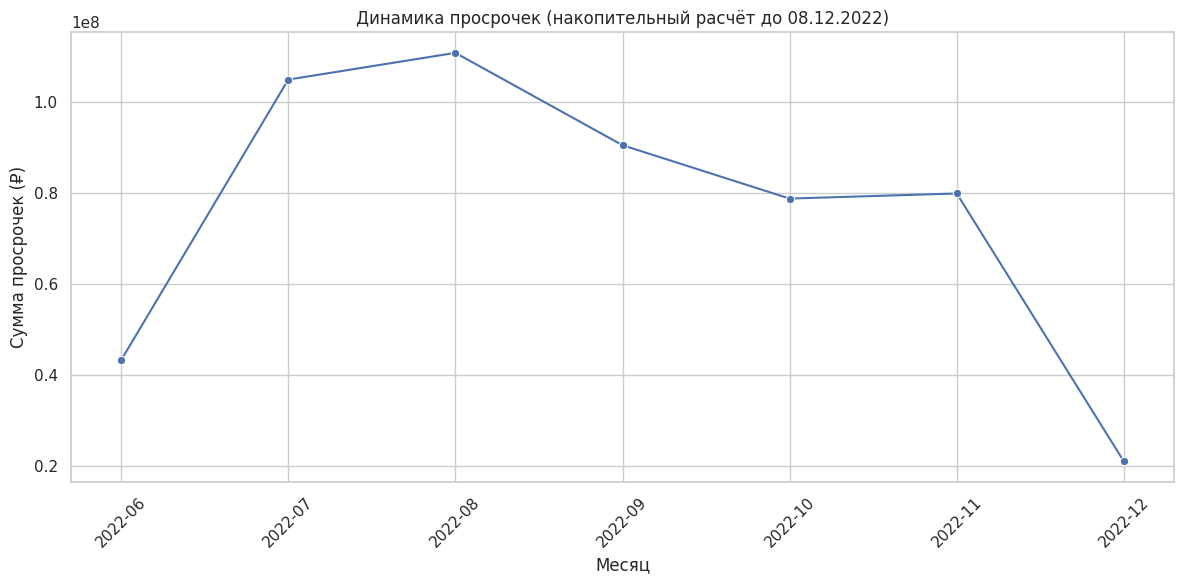

In [187]:
# Визуализация
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_overdue, x="month", y="overdue", marker="o")
plt.title("Динамика просрочек (накопительный расчёт до 08.12.2022)")
plt.xlabel("Месяц")
plt.ylabel("Сумма просрочек (₽)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Просрочки нарастают с июня по август.
- Последние месяцы (ноябрь–декабрь) показывают стабилизацию или начало снижения.

**Категория	- Что означает**

* Платит в срок -	Клиент полностью покрыл все обязательства
* Малые просрочки	- Просрочка до 25% от суммы кредита
* Средние	- От 25% до 75%
* Большие	- Более 75% просрочки — почти не платит

In [191]:
# Сначала: сумма просрочек по каждому order_id
total_overdue_per_order = merged.groupby("order_id")["overdue"].sum().reset_index()
total_overdue_per_order.columns = ["order_id", "total_overdue"]

# Присоединяем к заявкам
orders["duration_days"] = (orders["closed_at"] - orders["put_at"]).dt.days

order_enriched = pd.merge(orders, total_overdue_per_order, on="order_id", how="left")
order_enriched["total_overdue"] = order_enriched["total_overdue"].fillna(0)
order_enriched["overdue_ratio"] = order_enriched["total_overdue"] / order_enriched["issued_sum"]

# Категоризация клиентов по уровню просрочки
def categorize_overdue(ratio):
    if ratio == 0:
        return "Платит в срок"
    elif ratio <= 0.25:
        return "Малые просрочки"
    elif ratio <= 0.75:
        return "Средние просрочки"
    else:
        return "Большие просрочки"

order_enriched["overdue_category"] = order_enriched["overdue_ratio"].apply(categorize_overdue)

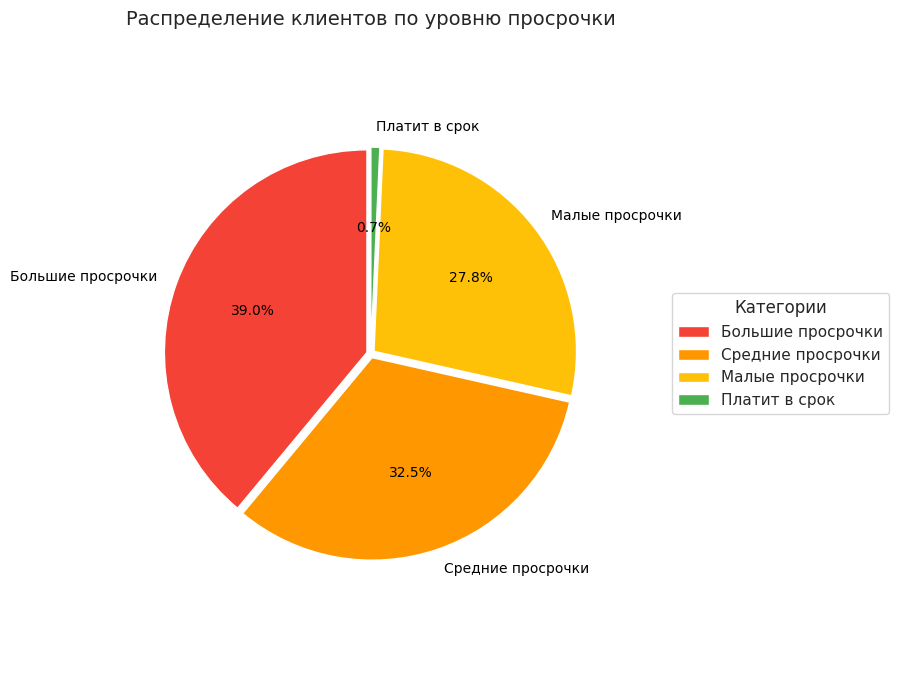

In [192]:
# Распределение клиентов по категориям
category_distribution = order_enriched["overdue_category"].value_counts(normalize=True).reset_index()
category_distribution.columns = ["Категория", "Доля клиентов"]


colors = ["#F44336", "#FF9800", "#FFC107", "#4CAF50"]
explode = [0.02] * len(category_distribution)

plt.figure(figsize=(9, 7))
wedges, texts, autotexts = plt.pie(
    category_distribution["Доля клиентов"],
    labels=category_distribution["Категория"],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    textprops=dict(color="black", fontsize=10)
)

plt.title("Распределение клиентов по уровню просрочки", fontsize=14)
plt.axis('equal')
plt.legend(wedges, category_distribution["Категория"],
           title="Категории", loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


- Только 0.7% клиентов полностью платят в срок — тревожный сигнал.
- Почти 40% клиентов имеют крупные просрочки (более 75% от суммы кредита).

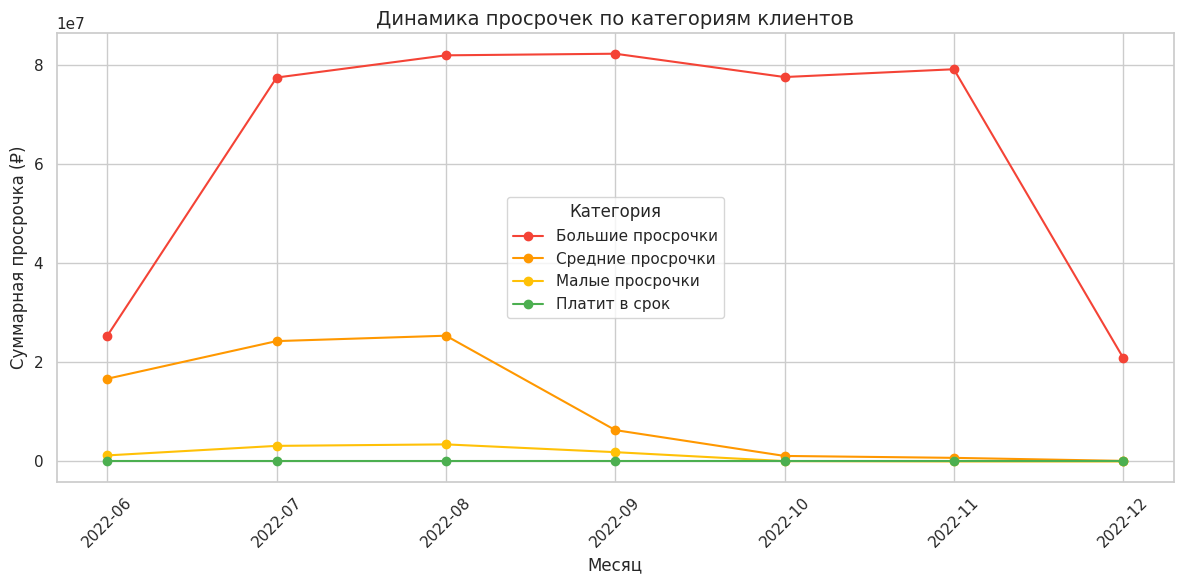

In [197]:
# Добавим категорию в merged (там где по месяцам у нас плановые даты и просрочки)
merged = pd.merge(merged, order_enriched[["order_id", "overdue_category"]], on="order_id", how="left")

# Сгруппируем по месяцу и категории
category_trend = merged.groupby(["month", "overdue_category"])["overdue"].sum().reset_index()

category_pivot = category_trend.pivot(index="month", columns="overdue_category", values="overdue").fillna(0)

colors = ["#F44336", "#FF9800", "#FFC107", "#4CAF50"]
category_order = ["Большие просрочки", "Средние просрочки", "Малые просрочки", "Платит в срок"]

plt.figure(figsize=(12, 6))
for i, cat in enumerate(category_order):
    if cat in category_pivot.columns:
        plt.plot(category_pivot.index, category_pivot[cat], marker="o", label=cat, color=colors[i])

plt.title("Динамика просрочек по категориям клиентов", fontsize=14)
plt.xlabel("Месяц")
plt.ylabel("Суммарная просрочка (₽)")
plt.xticks(rotation=45)
plt.legend(title="Категория")
plt.tight_layout()
plt.show()


- Большие просрочки	Активно растут — особенно с августа.
- Средние просрочки	Постепенно растут, спад с июля по октябрь
- Малые просрочки	Были заметны летом, но постепенно снижаются — либо клиенты платят, либо уходят в худшую категорию.
- Платит в срок	Практически нулевая просрочка, логично. На графике почти незаметна.

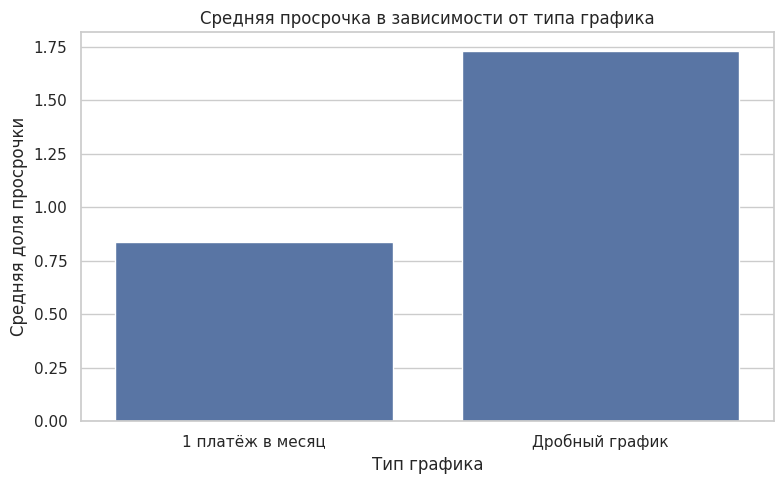

In [199]:
# Проверим сколько у клиентов >1 планов в каком-либо месяце
plan["month"] = plan["plan_at"].dt.to_period("M")
plans_per_month = plan.groupby(["order_id", "month"]).size().reset_index(name="num_plans")

# Пометим клиентов с "дробным графиком" (если хотя бы в одном месяце было >1 плана)
clients_with_split_plan = plans_per_month.groupby("order_id")["num_plans"].max().reset_index()
clients_with_split_plan["split_plan"] = clients_with_split_plan["num_plans"] > 1

order_with_split_info = pd.merge(order_enriched, clients_with_split_plan[["order_id", "split_plan"]], on="order_id", how="left")

# Средняя просрочка по группам
grouped_overdue = order_with_split_info.groupby("split_plan")["overdue_ratio"].mean().reset_index()
grouped_overdue["split_plan"] = grouped_overdue["split_plan"].map({True: "Дробный график", False: "1 платёж в месяц"})

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped_overdue, x="split_plan", y="overdue_ratio",)
plt.title("Средняя просрочка в зависимости от типа графика")
plt.xlabel("Тип графика")
plt.ylabel("Средняя доля просрочки")
plt.tight_layout()
plt.show()

### **Как бы считали то же самое в SQL? (PostgreSQL)**
```
-- 1. Вычисляем накопленные платежи по каждому order_id до каждой плановой даты
WITH payments_cumulative AS (
  SELECT
    p1.order_id,
    p1.plan_at,
    SUM(p2.paid_sum) AS cumulative_paid
  FROM plan p1
  LEFT JOIN payments p2
    ON p1.order_id = p2.order_id AND p2.paid_at <= p1.plan_at
  WHERE p1.plan_at <= DATE '2022-12-08'  -- Ограничение по дате
  GROUP BY p1.order_id, p1.plan_at
),

-- 2. Сравниваем накопительный план и накопленные платежи
plan_vs_paid AS (
  SELECT
    pl.order_id,
    pl.plan_at,
    pl.plan_sum_total,
    COALESCE(pc.cumulative_paid, 0) AS cumulative_paid,
    GREATEST(pl.plan_sum_total - COALESCE(pc.cumulative_paid, 0), 0) AS overdue
  FROM plan pl
  LEFT JOIN payments_cumulative pc
    ON pl.order_id = pc.order_id AND pl.plan_at = pc.plan_at
  WHERE pl.plan_at <= DATE '2022-12-08'  -- Ограничение по дате
)

-- 3. Агрегируем просрочки по каждому заказу
SELECT
  o.order_id,
  o.issued_sum,
  SUM(pvp.overdue) AS total_overdue,
  ROUND(SUM(pvp.overdue)::numeric / o.issued_sum, 3) AS overdue_ratio
FROM orders o
LEFT JOIN plan_vs_paid pvp ON o.order_id = pvp.order_id
GROUP BY o.order_id, o.issued_sum
ORDER BY overdue_ratio DESC;
```



## **Итоги анализа просрочек по кредитам**

### Что сделано:
- Проведён предварительный EDA: проверка типов, пропусков, выбросов.
- Построены визуализации по выдаче и оплатам по дням.
- Использован **накопительный подход**: `plan_sum_total` vs `cumulative_paid` для точной оценки просрочек.
- Учтён **срез по дате 08.12.2022**, как указано в задании.
- Выделены категории клиентов по уровню просрочки:
    - **Платит в срок** (0% просрочки)
    - **Малые просрочки** (до 25%)
    - **Средние просрочки** (25–75%)
    - **Большие просрочки** (более 75%)
- Построена динамика просрочек по месяцам и категориям.
- Отдельно проанализирована связь с суммой кредита и частотой планов.

### Важно:
- **Декабрь 2022 года содержит только первые 8 дней данных**, поэтому:
    - Количество планов и фактических платежей резко меньше;
    - Просрочка за декабрь занижена **и не сопоставима с полными месяцами**;
    - Это обязательно нужно учитывать в выводах.

### Рекомендации:
- У клиентов с дробным графиком (>1 плана в месяц) просрочки выше.
- Уровень платёжной дисциплины в целом **низкий** — только ~0.7% клиентов платят полностью в срок.
- Возможны меры по скорингу, изменению графика, внедрению системы раннего реагирования.